In [ ]:
from google.colab import files
uploaded = files.upload()

Saving enjoysport.csv to enjoysport.csv


''Program 1 :-
Implement and demonstrate the FIND-S algorithm for finding the most specific
hypothesis based on a given set of training data samples. Read the training data from a
.CSV file.

In [ ]:
import csv
a = []
with open('enjoysport.csv', 'r') as csvfile:
    next(csvfile)
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)

print("\nThe total number of training instances are : ",len(a))

num_attribute = len(a[0])-1

print("\nThe initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        print ("\nInstance ", i+1, "is", a[i], " and is Positive Instance")
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

    if a[i][num_attribute] == 'no':
        print ("\nInstance ", i+1, "is", a[i], " and is Negative Instance Hence Ignored")
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

print("\nThe Maximally specific hypothesis for the training instance is ", hypothesis)

[['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

The total number of training instances are :  4

The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

Instance  1 is ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 1  is:  ['sunny', 'warm', 'normal', 'strong', 'warm', 'same'] 


Instance  2 is ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 2  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  3 is ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 3  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  4 is ['s

Program 2:-
For a given set of training data examples stored in a .CSV file, implement and demonstrate
the Candidate Elimination algorithm to output a description of the set of all hypothesis
consistent with the training examples.

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("enjoysport.csv")
concepts = np.array(data.iloc[:, 0:-1])
print("\nInstances are:\n", concepts)
target = np.array(data.iloc[:, -1])
print("\nTarget Values are: ", target)

def learn(concepts, target):
    positive_instances = [concepts[i] for i in range(len(concepts)) if target[i] == 'yes']
    specific_h = positive_instances[0].copy()
    print("\nInitialization of specific_h and generic_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [['?' for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print("\nGeneric Boundary: ", general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i + 1, "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Boundary after ", i + 1, "Instance is ", specific_h)
        print("Generic Boundary after ", i + 1, "Instance is ", general_h)
        print("\n")

    # Clean up the redundant hypotheses in the generic boundary
    indices = [i for i, val in enumerate(general_h) if val == ['?' for _ in range(len(specific_h))]]
    for i in indices:
        general_h.remove(['?' for _ in range(len(specific_h))])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")



Instances are:
 [['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]

Target Values are:  ['yes' 'yes' 'no' 'yes']

Initialization of specific_h and generic_h

Specific Boundary:  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Instance is Positive 
Specific Boundary after  1 Instance is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]





Program 3)Write a program to demonstrate the working of the decision tree based ID3 algorithm.
Use an appropriate data set for building the decision tree and apply this knowledge to
classify a new sample.

In [ ]:
import csv

class Node:
    def __init__(self, attribute=None, value=None, results=None, true_branch=None, false_branch=None):
        self.attribute, self.value, self.results, self.true_branch, self.false_branch = attribute, value, results, true_branch, false_branch

def unique_counts(rows):
    from collections import Counter
    return Counter(row[-1] for row in rows)

def entropy(rows):
    from math import log2
    counts = unique_counts(rows)
    return -sum((p / len(rows)) * log2(p / len(rows)) for p in counts.values())

def divide_data(rows, column, value):
    split_function = lambda row: row[column] == value
    true_rows, false_rows = [row for row in rows if split_function(row)], [row for row in rows if not split_function(row)]
    return true_rows, false_rows

def information_gain(current_entropy, true_rows, false_rows):
    p = len(true_rows) / (len(true_rows) + len(false_rows))
    return current_entropy - p * entropy(true_rows) - (1 - p) * entropy(false_rows)

def find_best_split(rows):
    current_entropy = entropy(rows)
    best_gain, best_criteria = 0, None
    for col in range(len(rows[0]) - 1):
        values = set(row[col] for row in rows)
        for value in values:
            true_rows, false_rows = divide_data(rows, col, value)
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue
            gain = information_gain(current_entropy, true_rows, false_rows)
            if gain > best_gain:
                best_gain, best_criteria = gain, (col, value)
    return best_criteria

def build_tree(rows):
    if len(set(row[-1] for row in rows)) == 1:
        return Node(results=unique_counts(rows))
    best_criteria = find_best_split(rows)
    if best_criteria is None:
        return Node(results=unique_counts(rows))
    col, value = best_criteria
    true_rows, false_rows = divide_data(rows, col, value)
    true_branch, false_branch = build_tree(true_rows), build_tree(false_rows)
    return Node(attribute=col, value=value, true_branch=true_branch, false_branch=false_branch)

def classify(node, sample):
    if node.results:
        return max(node.results, key=node.results.get)
    branch = node.true_branch if sample[node.attribute] == node.value else node.false_branch
    return classify(branch, sample)

# Load data from CSV file
with open('enjoysport.csv', 'r') as file:
    reader = csv.reader(file)
    headers = next(reader)
    training_data = list(reader)

# Build the decision tree
tree = build_tree(training_data)

# Classify a new sample
new_sample = ['sunny', 'warm', 'normal', 'strong', 'cool', 'same']
prediction = classify(tree, new_sample)

# Display the decision tree and prediction
print("Decision Tree:")
print(tree)
print("\nPrediction for {}: {}".format(new_sample, prediction))


Decision Tree:

Prediction for ['sunny', 'warm', 'normal', 'strong', 'cool', 'same']: yes


Program 4)Write a program to demonstrate the working of Support Vector Machine by using
appropriate data set.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


Iris Dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


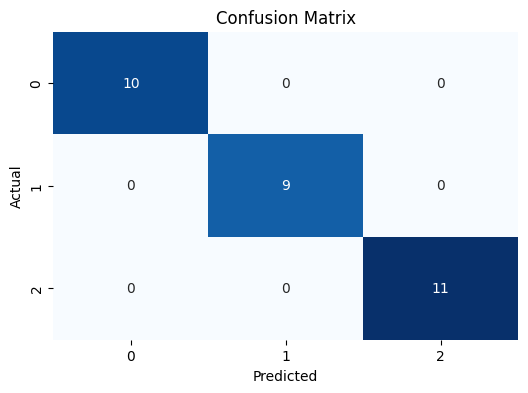

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


In [ ]:
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the contents of the archive.zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the Iris dataset
iris_data = pd.read_csv('Iris.csv')

# Display the first few rows of the dataset
print("Iris Dataset:")
print(iris_data.head())

# Split data into features and target
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display accuracy
print("Accuracy:", accuracy)


Program 5)Write a program to implement k- Nearest Neighbor algorithm to classify the iris data set.
Print both correct and wrong predictions. (Python ML library can be used for this
problem)

In [ ]:
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Extract the contents of the archive.zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the Iris dataset
iris_data = pd.read_csv('Iris.csv')

# Display the first few rows of the dataset
print("Iris Dataset:")
print(iris_data.head())

# Split data into features and target
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display correct and wrong predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Correct': y_test == y_pred})
print("\nCorrect Predictions:")
print(results[results['Correct']])

print("\nWrong Predictions:")
print(results[~results['Correct']])

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display accuracy
print("\nAccuracy:", accuracy)


Iris Dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Correct Predictions:
              Actual        Predicted  Correct
73   Iris-versicolor  Iris-versicolor     True
18       Iris-setosa      Iris-setosa     True
118   Iris-virginica   Iris-virginica     True
78   Iris-versicolor  Iris-versicolor     True
76   Iris-versicolor  Iris-versicolor     True
31       Iris-setosa      Iris-setosa     True
64   Iris-versicolor  Iris-versicolor     True
141   Iris-virginica   Iris-virginica     True
68   Iris-versicolor  Iris-versicolor     True
82   Iris-versicolor  Iris-versi

Iris Dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Correct Predictions:
              Actual        Predicted  Correct
73   Iris-versicolor  Iris-versicolor     True
18       Iris-setosa      Iris-setosa     True
118   Iris-virginica   Iris-virginica     True
78   Iris-versicolor  Iris-versicolor     True
76   Iris-versicolor  Iris-versicolor     True
31       Iris-setosa      Iris-setosa     True
64   Iris-versicolor  Iris-versicolor     True
141   Iris-virginica   Iris-virginica     True
68   Iris-versicolor  Iris-versicolor     True
82   Iris-versicolor  Iris-versi

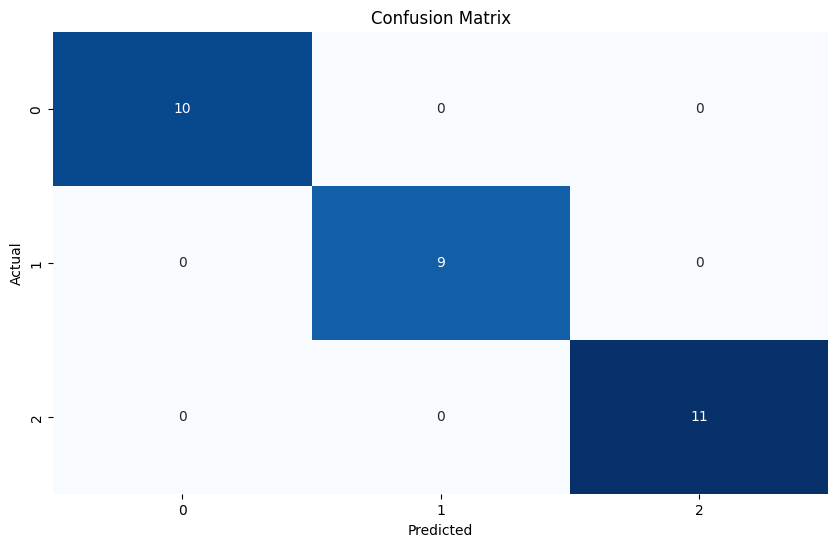


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Accuracy: 1.0


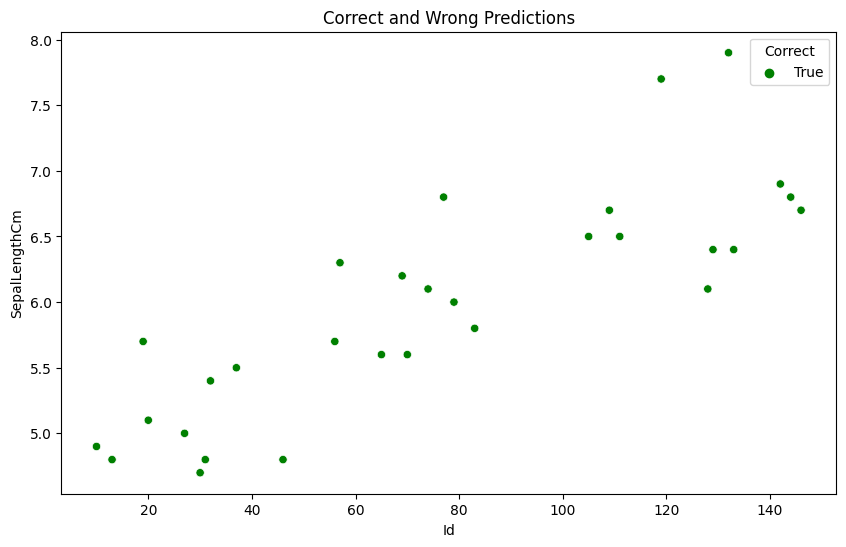

In [ ]:
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the contents of the archive.zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the Iris dataset
iris_data = pd.read_csv('Iris.csv')

# Display the first few rows of the dataset
print("Iris Dataset:")
print(iris_data.head())

# Split data into features and target
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display correct and wrong predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Correct': y_test == y_pred})
print("\nCorrect Predictions:")
print(results[results['Correct']])

print("\nWrong Predictions:")
print(results[~results['Correct']])

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display accuracy
print("\nAccuracy:", accuracy)

# Plot correct and wrong predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=results['Correct'], palette={True: 'green', False: 'red'})
plt.title('Correct and Wrong Predictions')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()
